In [173]:
install.packages("tm")
install.packages("wordcloud")

In [2]:
library(twitteR)
library(tm)
library(RColorBrewer)
library(wordcloud)
library(readxl)

Loading required package: NLP


In [8]:
#Twitter connection
setup_twitter_oauth("wTp3cBoGCc4kPqpBxcBQLZAEx","cpGO07H3BScmbTNheewqUHmUH1Z059mO41KogT755YHqLMJxZk","772118317742055424-LtYPNm4dr2Mvq0tlVKKcz1QdRswqVtB","cKALwsJ9bliKNS22csI9lN9d56UcjgHpxjYaKjVWik250")

[1] "Using direct authentication"


In [9]:
set.seed(125)
search_term<-"#IPL OR #ipl2017 OR #VivoIPL OR Indian Premier League OR cricket"
no_of_terms_to_search=2500
tweets_fetched<-searchTwitter(search_term,n=no_of_terms_to_search)

In [12]:
set.seed(125)
head(tweets_fetched)

[[1]]
[1] "bhoriasunil: RT @Kumar_Ke5hav: @SrBachchan Sir PPL (Panama Premier League) mein bhi iss Indian player ne top performance diya tha. https://t.co/VnDSayPH…"

[[2]]
[1] "nidumukka: INDIAN PREMIER LEAGUE TURN VERY INTRESTING NOW"

[[3]]
[1] "santhoshraj2961: Rana, Rohit, Pollard seal another Wankhede chase https://t.co/txQ3sZBI9W"

[[4]]
[1] "santhoshraj2961: Sunrisers, Kings XI look to keep slump at bay https://t.co/IMWkrVzqsN"

[[5]]
[1] "sivabvijay: RT @ESPNcricinfo: 'People are still looking out for Chris Gayle. The universe boss is still here and still alive' \n\nhttps://t.co/KceSScXbJP…"

[[6]]
[1] "News365247live: RT @ESPNcricinfo: 'People are still looking out for Chris Gayle. The universe boss is still here and still alive' \n\nhttps://t.co/KceSScXbJP…"


In [14]:
set.seed(125)
no_retweets=strip_retweets(tweets_fetched, strip_manual=TRUE, strip_mt=TRUE)
head(no_retweets)

[[1]]
[1] "nidumukka: INDIAN PREMIER LEAGUE TURN VERY INTRESTING NOW"

[[2]]
[1] "santhoshraj2961: Rana, Rohit, Pollard seal another Wankhede chase https://t.co/txQ3sZBI9W"

[[3]]
[1] "santhoshraj2961: Sunrisers, Kings XI look to keep slump at bay https://t.co/IMWkrVzqsN"

[[4]]
[1] "ICCSports_Live: 'People are still looking out for Chris Gayle. The universe boss is still here and still alive' \n\nhttps://t.co/cuj2QMsPMT #IPL #Gayle10000…"

[[5]]
[1] "ESPNcricinfo: 'People are still looking out for Chris Gayle. The universe boss is still here and still alive' \n\nhttps://t.co/KceSScXbJP #IPL #Gayle10000"

[[6]]
[1] "NarayanShastri: #Butterfingers #IPL2017 #IPL #IPL10 \nhttps://t.co/YZfiadltMX"


In [15]:
df_tweet_ipl<-twListToDF(no_retweets)

In [16]:
dim(df_tweet_ipl)


[1] 1579   16

In [17]:
#https://rstudio-pubs-static.s3.amazonaws.com/93384_92b6fcd92c5642a2a52e97cd5694b6ab.html
df_tweet_ipl$text=gsub("(f|ht)(tp)(s?)(://)(\\S*)", "", df_tweet_ipl$text) #remove URLs (http, https, ftp)
df_tweet_ipl$text=gsub("[^0-9A-Za-z///' ]", "", df_tweet_ipl$text) #remove all non english / non numeric 

In [18]:
print(df_tweet_ipl$text)

   [1] "INDIAN PREMIER LEAGUE TURN VERY INTRESTING NOW"                                                                                            
   [2] "Rana Rohit Pollard seal another Wankhede chase "                                                                                           
   [3] "Sunrisers Kings XI look to keep slump at bay "                                                                                             
   [4] "'People are still looking out for Chris Gayle The universe boss is still here and still alive'  IPL Gayle10000"                            
   [5] "'People are still looking out for Chris Gayle The universe boss is still here and still alive'  IPL Gayle10000"                            
   [6] "Butterfingers IPL2017 IPL IPL10 "                                                                                                          
   [7] "GUJARAT LIONS win the toss and opt to BOWL FIRSTAll the action   GLvRCB ipl"                            

In [19]:
IPL<-Corpus(VectorSource(df_tweet_ipl$text))
IPL
inspect(IPL)[1:10]

<<SimpleCorpus>>
Metadata:  corpus specific: 1, document level (indexed): 0
Content:  documents: 1579

<<SimpleCorpus>>
Metadata:  corpus specific: 1, document level (indexed): 0
Content:  documents: 1579

   [1] INDIAN PREMIER LEAGUE TURN VERY INTRESTING NOW                                                                                            
   [2] Rana Rohit Pollard seal another Wankhede chase                                                                                            
   [3] Sunrisers Kings XI look to keep slump at bay                                                                                              
   [4] 'People are still looking out for Chris Gayle The universe boss is still here and still alive'  IPL Gayle10000                            
   [5] 'People are still looking out for Chris Gayle The universe boss is still here and still alive'  IPL Gayle10000                            
   [6] Butterfingers IPL2017 IPL IPL10                                                                                                           
   [7] GUJARAT LIONS 

<<SimpleCorpus>>
Metadata:  corpus specific: 1, document level (indexed): 0
Content:  documents: 10

In [20]:
data<-tm_map(IPL,stripWhitespace)
data<-tm_map(data,tolower)
data<-tm_map(data,removeNumbers)
data<-tm_map(data,removePunctuation)
data<-tm_map(data,removeWords, c('the','in','to','of','on','I','by','get','By','Who','The'))
data<-tm_map(data,removeWords,stopwords('english'))
inspect(data)[1:100]

<<SimpleCorpus>>
Metadata:  corpus specific: 1, document level (indexed): 0
Content:  documents: 1579

   [1] indian premier league turn  intresting now                                                                                          
   [2] rana rohit pollard seal another wankhede chase                                                                                      
   [3] sunrisers kings xi look  keep slump  bay                                                                                            
   [4] people  still looking   chris gayle  universe boss  still   still alive ipl gayle                                                   
   [5] people  still looking   chris gayle  universe boss  still   still alive ipl gayle                                                   
   [6] butterfingers ipl ipl ipl                                                                                                           
   [7] gujarat lions win  toss  opt  bowl firstall  actio

<<SimpleCorpus>>
Metadata:  corpus specific: 1, document level (indexed): 0
Content:  documents: 100

In [22]:
#http://stackoverflow.com/questions/33193152/unable-to-convert-a-corpus-to-data-frame-in-r
text<-data.frame(text = sapply(data, as.character), stringsAsFactors = FALSE)
head(text)

text
indian premier league turn intresting now
rana rohit pollard seal another wankhede chase
sunrisers kings xi look keep slump bay
people still looking chris gayle universe boss still still alive ipl gayle
people still looking chris gayle universe boss still still alive ipl gayle
butterfingers ipl ipl ipl


In [260]:
fileConn<-file("tweets.txt")
writeLines(text$text, fileConn)
close(fileConn)
#writeLines(df_tweet_ipl$text)

In [3]:
DATA_CRICKET<-read_excel("Tweets_Cricket.xlsx")
DATA_CRICKET

Word,Count
aage,1
aapke,1
aaron,1
aata,1
ab,7
abdevilliers,1
able,1
aboutcfll,1
aboutlastnight,1
ac,1


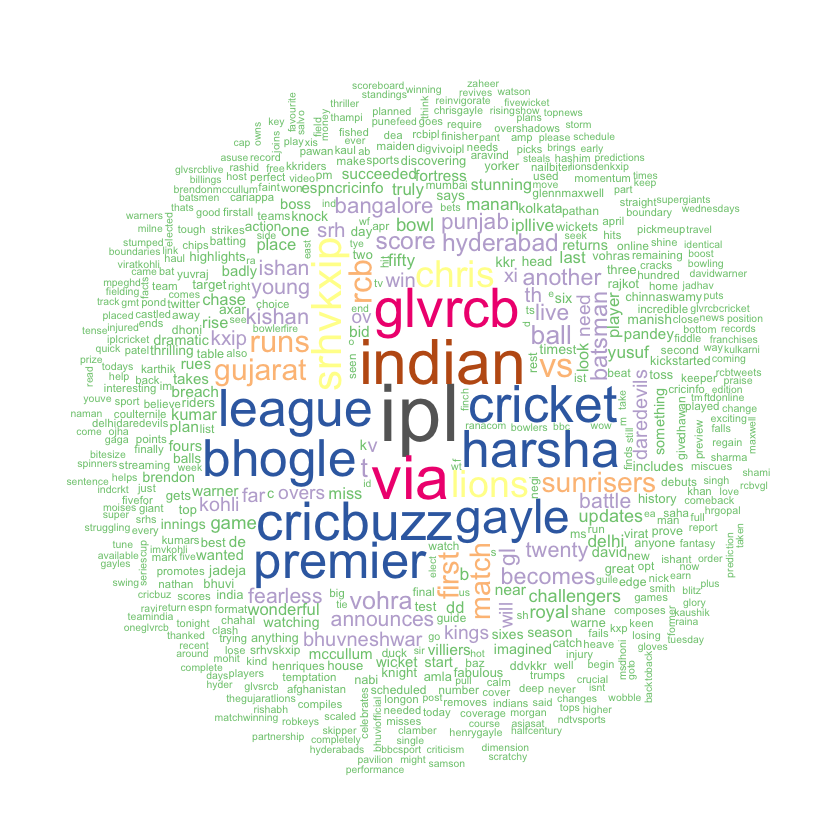

In [31]:
#https://rstudio-pubs-static.s3.amazonaws.com/93384_92b6fcd92c5642a2a52e97cd5694b6ab.html
#https://cran.r-project.org/web/packages/RColorBrewer/RColorBrewer.pdf

wordcloud(words = DATA_CRICKET$Word, freq = DATA_CRICKET$Count, min.freq = 3,
random.order = F, colors =brewer.pal(8,"Accent"))